Tensorflow version: 2.15.0 (Expected 2.7.0)
11490434/11490434 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

 Plot of the first 25 samples in the MNIST training set


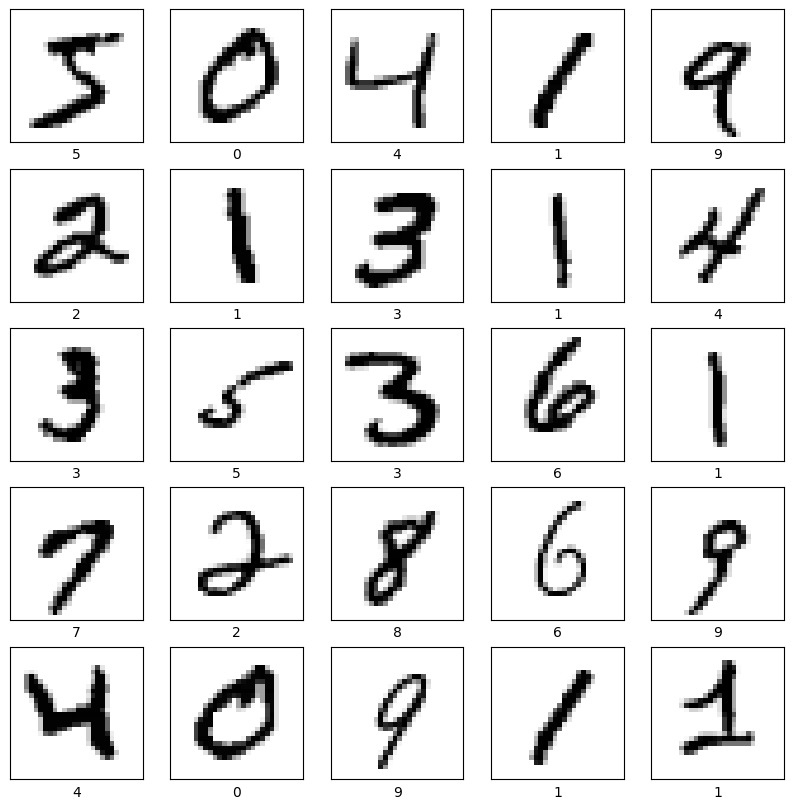

Normalization worked out well, you are ready to go.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dro

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 15s 14ms/step - loss: 0.5024 - accuracy: 0.8724 - val_loss: 0.9873 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1849 - accuracy: 0.9631 - val_loss: 0.0919 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1390 - accuracy: 0.9725 - val_loss: 0.0723 - val_accuracy: 0.9892 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1094 - accuracy: 0.9768 - val_loss: 0.0657 - val_accuracy: 0.9887 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0956 - accuracy: 0.9803 - val_loss: 0.0544 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0835 - accuracy: 0.9823 - val_loss: 0.0555 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss:

In [2]:
import checker
import generator

from IPython.display import display, clear_output
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import importlib
importlib.reload(checker)
importlib.reload(generator)

#checker.test_add(add)

import tensorflow as tf

from tensorflow.keras.callbacks import ReduceLROnPlateau
print('Tensorflow version:', tf.__version__, '(Expected 2.7.0)')

# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Plotting data samples
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

x_train_normalized = x_train/255
x_test_normalized = x_test/255

x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)

checker.test_normalize(x_train, x_train_normalized)

marvin = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.0005), kernel_constraint=tf.keras.constraints.max_norm(3.0)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',  kernel_regularizer=tf.keras.regularizers.l2(0.0005), kernel_constraint=tf.keras.constraints.max_norm(3.0)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform', kernel_constraint=tf.keras.constraints.max_norm(3.0)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])
marvin.summary()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(-tf.math.log(1/10))
sampleID = 100
loss_fn(y_train[:1], marvin(x_train[sampleID-1:sampleID]).numpy()).numpy()

variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 1.5,  min_delta=1E-7)

marvin.compile(optimizer= 'adam',
              loss=loss_fn,
              metrics=['accuracy'])

marvin.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks = [variable_learning_rate]
)

model_name = marvin

In [7]:
model_name = "marvin.h5"
marvin.save(model_name, save_format='h5')
print('Success! You saved Marvin as: ', model_name)

Success! You saved Marvin as:  marvin.h5


In [11]:
model_name = "marvin.h5"
marvin_reloaded = tf.keras.models.load_model(model_name)

predictions = marvin_reloaded.predict([x_test])

predictions = np.argmax(predictions, axis=1)
#pd.DataFrame(predictions)

313/313 [==============================] - 1s 2ms/step


<ipython-input-12-e97ae2ebf608>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


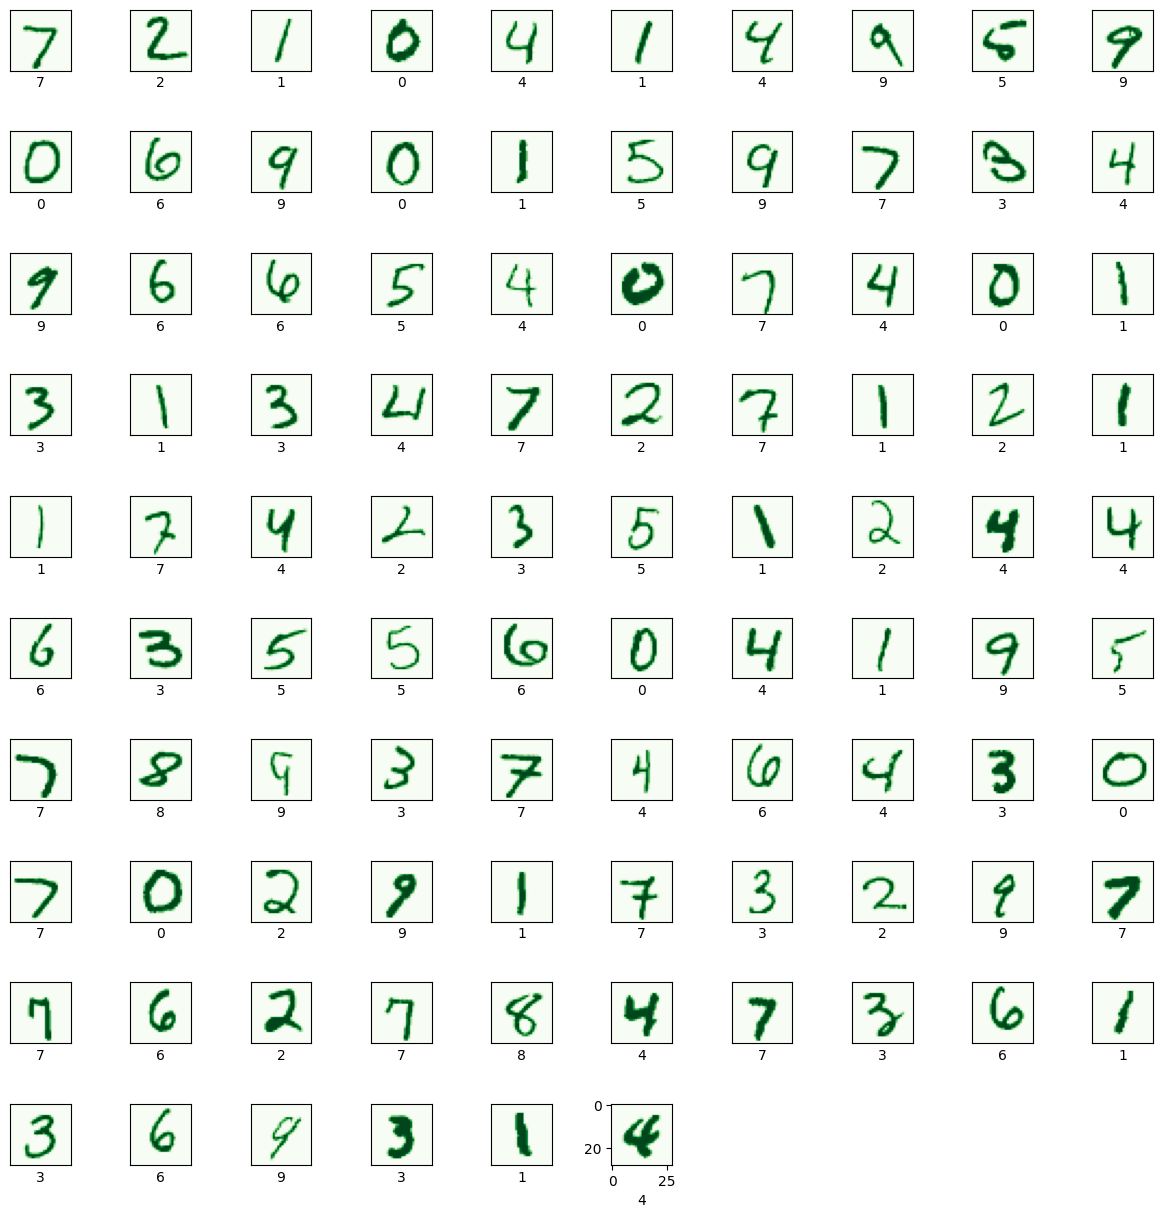

In [12]:
# Plot for the intuitive approach

numbers_to_display = 96
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

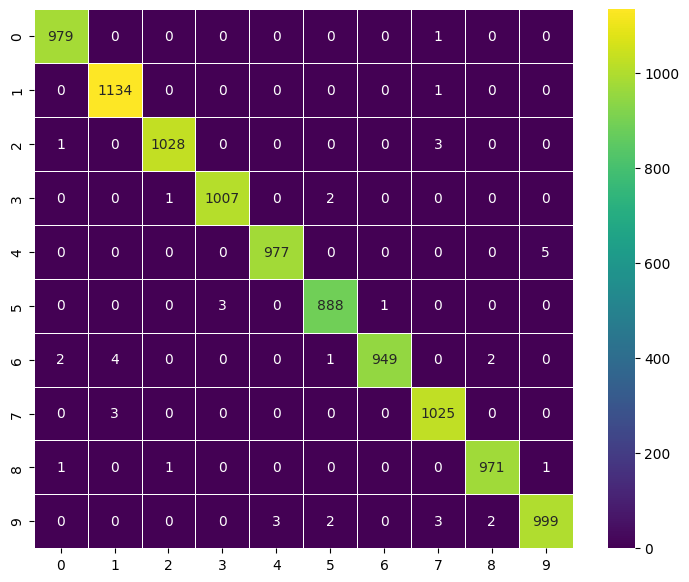

In [13]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()